### Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.ticker import PercentFormatter 
import plotly as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\JOSH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the data 

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [3]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [4]:
## checking the columns of the client dataframe to

client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [5]:
## viewing the first five columns in the price dataframe

price_df.head(5)
#price_df.nunique

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# checking the cloumns


price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [7]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [8]:
# shape of the price dataframe

price_df.shape

(193002, 8)

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [11]:
# shape of the client DataFrame

client_df.shape

(14606, 26)

In [12]:
# Basic info about the client dataframe


client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [13]:
# List of all features with number of unique values present in them


client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [14]:
# Statistical measure of dataset


client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [15]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [16]:
#labels = client_df["channel_sales"].unique()
client_df["channel_sales"].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [17]:
# Dropping the rows which states's value is "MISSING" in channel_sales

client_df = client_df[client_df["channel_sales"].str.contains("MISSING") == False]
client_df.reset_index(drop=True)
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1


In [18]:
#shape ofthe client dataset
client_df.shape

(10881, 26)

In [19]:
# cheching correlation
client_df.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.438837,0.968999,0.194231,0.189641,-0.049059,0.075674,-0.028726,0.148930,-0.055226,0.170602,-0.027676,-0.027648,0.132300,0.125223,0.053174,0.099745,-0.052184
cons_gas_12m,0.438837,1.000000,0.458462,0.080228,0.088579,-0.009843,0.049538,-0.035991,0.070923,-0.040993,0.079669,0.002723,0.002702,0.225301,0.066229,-0.004649,0.069313,-0.037196
cons_last_month,0.968999,0.458462,1.000000,0.176939,0.207083,-0.045820,0.066631,-0.024415,0.138863,-0.050846,0.190062,-0.027405,-0.027377,0.140221,0.113422,0.043065,0.089576,-0.052022
forecast_cons_12m,0.194231,0.080228,0.176939,1.000000,0.698755,0.061483,0.309669,-0.166133,0.252088,-0.086711,0.659734,-0.017526,-0.017537,0.062963,0.757806,-0.042389,0.436941,0.018213
forecast_cons_year,0.189641,0.088579,0.207083,0.698755,1.000000,0.008053,0.303789,-0.180074,0.277313,-0.108350,0.968973,-0.002969,-0.002922,0.050069,0.488126,-0.015552,0.369605,0.000658
forecast_discount_energy,-0.049059,-0.009843,-0.045820,0.061483,0.008053,1.000000,-0.009763,0.388037,0.057566,0.072967,0.038221,0.248528,0.247645,0.108835,0.086858,-0.075882,0.000530,0.015854
forecast_meter_rent_12m,0.075674,0.049538,0.066631,0.309669,0.303789,-0.009763,1.000000,-0.636402,0.717657,-0.493981,0.231862,0.211993,0.212066,0.024155,0.273775,-0.031499,0.608441,0.052660
forecast_price_energy_off_peak,-0.028726,-0.035991,-0.024415,-0.166133,-0.180074,0.388037,-0.636402,1.000000,-0.397802,0.693278,-0.111297,0.131574,0.131192,0.022951,-0.131287,-0.015173,-0.407290,-0.027611
forecast_price_energy_peak,0.148930,0.070923,0.138863,0.252088,0.277313,0.057566,0.717657,-0.397802,1.000000,-0.497684,0.220070,0.178358,0.178454,0.048627,0.227904,0.010143,0.429918,0.031128
forecast_price_pow_off_peak,-0.055226,-0.040993,-0.050846,-0.086711,-0.108350,0.072967,-0.493981,0.693278,-0.497684,1.000000,-0.074267,0.000237,0.000138,-0.029963,-0.093573,-0.034674,-0.279481,0.004837


In [20]:
## change the date of our dataframe to years
for date in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[date] = pd.to_datetime(client_df[date])
client_df["year_active"]=client_df["date_activ"].dt.year
client_df["year_ended"]=client_df["date_end"].dt.year
client_df["year_renewed"]=client_df["date_renewal"].dt.year

C:\Users\JOSH\AppData\Local\Temp\ipykernel_9400\2586205808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df[date] = pd.to_datetime(client_df[date])
C:\Users\JOSH\AppData\Local\Temp\ipykernel_9400\2586205808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df[date] = pd.to_datetime(client_df[date])
C:\Users\JOSH\AppData\Local\Temp\ipykernel_9400\2586205808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

<AxesSubplot:>

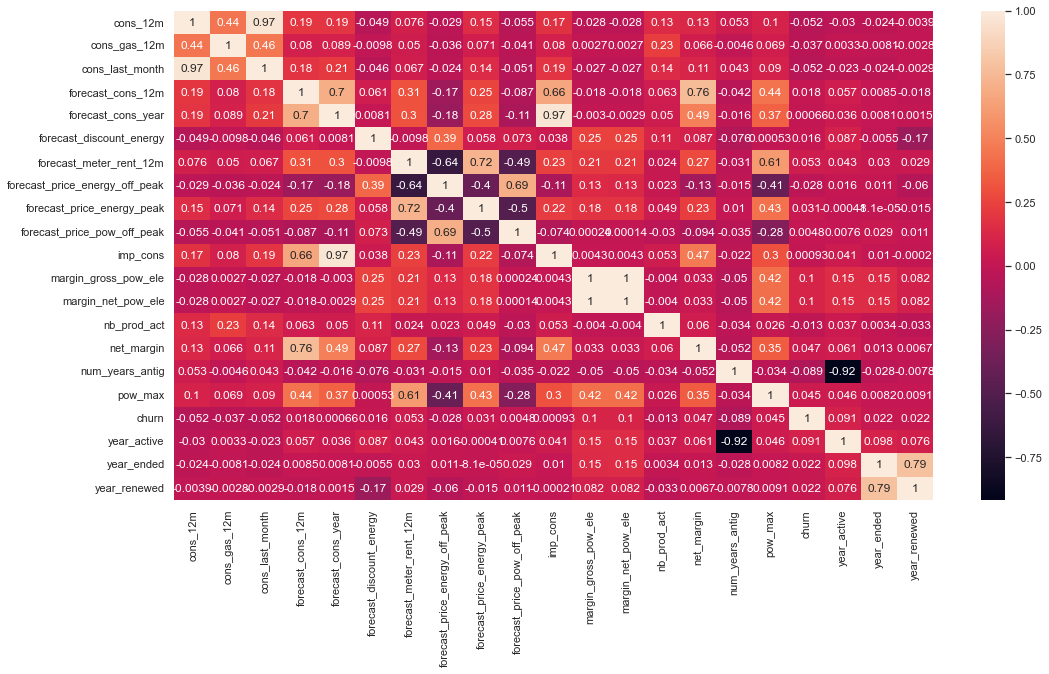

In [21]:
# Visualizing correlation

plt.figure(figsize=(17, 9))
sns.heatmap(client_df.corr(), annot=True)

In [22]:
## seperating the data set into differeny categories
## having the categorical columns first
col=[x for x in client_df.columns if client_df[x].dtype=="O"]
cat_col=client_df[col]
cat_col.nunique()

id               10881
channel_sales        7
has_gas              2
origin_up            5
dtype: int64

In [23]:
## encoding some of the variables as it's syntax cannot be understood
encoder=LabelEncoder()
cat_col["channel_sales"]=encoder.fit_transform(cat_col["channel_sales"])
cat_col["origin_up"]=encoder.fit_transform(cat_col["origin_up"])
cat_col["id"]=encoder.fit_transform(cat_col["id"])

C:\Users\JOSH\AppData\Local\Temp\ipykernel_9400\1186638120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_col["channel_sales"]=encoder.fit_transform(cat_col["channel_sales"])
C:\Users\JOSH\AppData\Local\Temp\ipykernel_9400\1186638120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_col["origin_up"]=encoder.fit_transform(cat_col["origin_up"])
C:\Users\JOSH\AppData\Local\Temp\ipykernel_9400\1186638120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

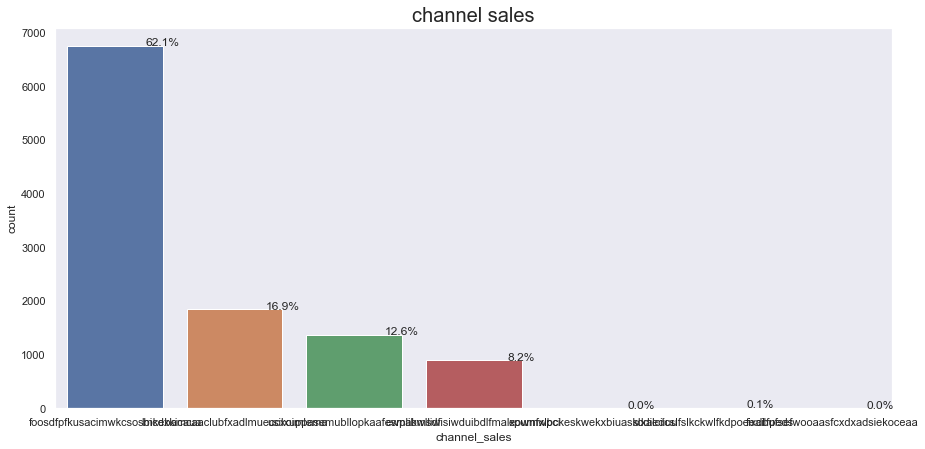

In [24]:
#check the percentage of the channel sales
sns.set(style="dark")
plt.figure(figsize=[15,7])
total=float(len(client_df["channel_sales"]))
ax=sns.countplot(x="channel_sales", data=client_df)
plt.title("channel sales", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

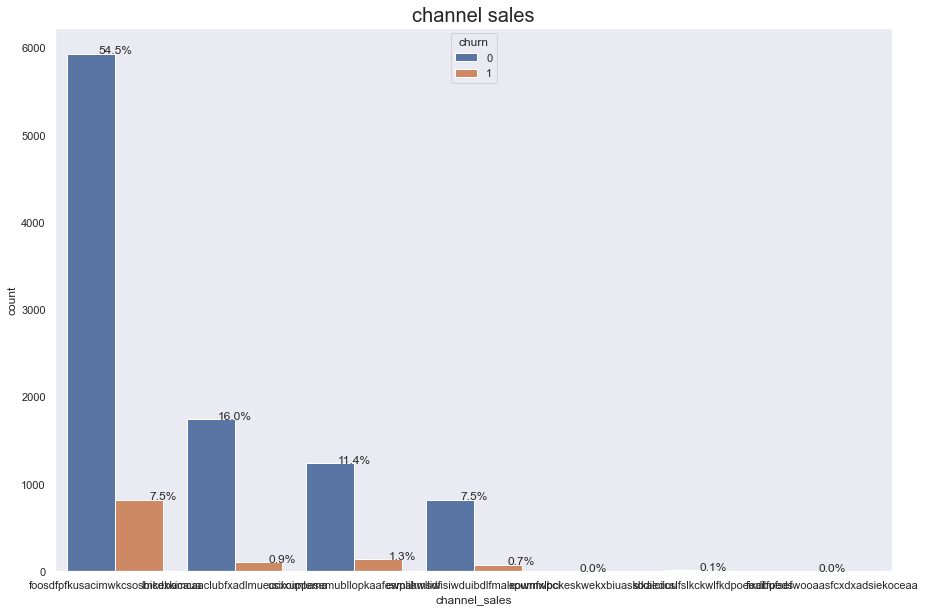

In [25]:
# the percentage of the channel sales with churn
sns.set(style="dark")
plt.figure(figsize=[15,10])
total=float(len(client_df['channel_sales']))
ax=sns.countplot(x="channel_sales", data=client_df, hue="churn")
plt.title("channel sales", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

###### churn tend to be more in channels with high sales

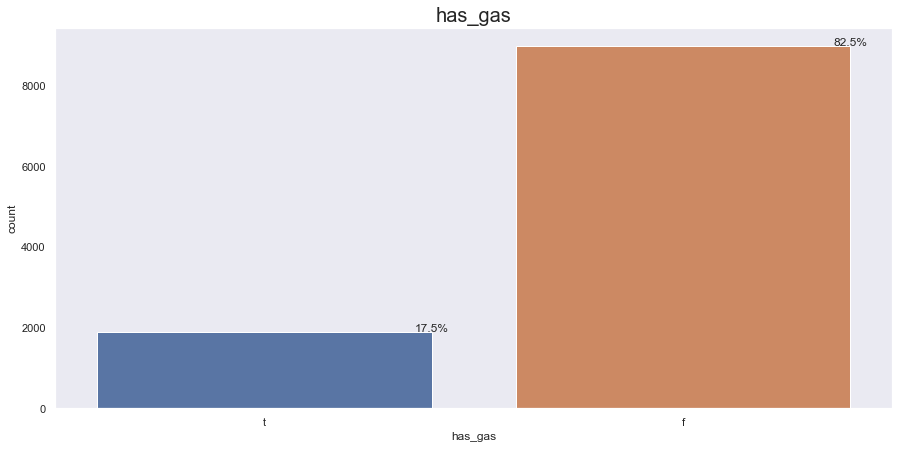

In [26]:
sns.set(style="dark")
plt.figure(figsize=[15,7])
total=float(len(client_df["has_gas"]))
ax=sns.countplot(x="has_gas", data=client_df)
plt.title("has_gas", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

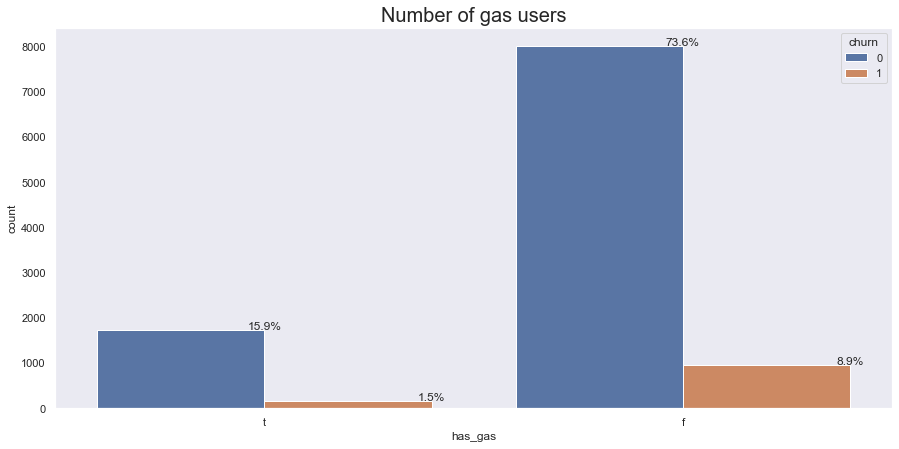

In [27]:
sns.set(style="dark")
plt.figure(figsize=[15,7])
total=float(len(client_df['has_gas']))
ax=sns.countplot(x="has_gas", data=client_df, hue="churn")
plt.title("Number of gas users", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

###### gas client tend to have churn while the other tend to have significant amount of churn customers

In [56]:
# numerical columns 
num_col=[x for x in client_df.columns if client_df[x].dtypes!="O"]
num_col

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'churn',
 'year_active',
 'year_ended',
 'year_renewed']

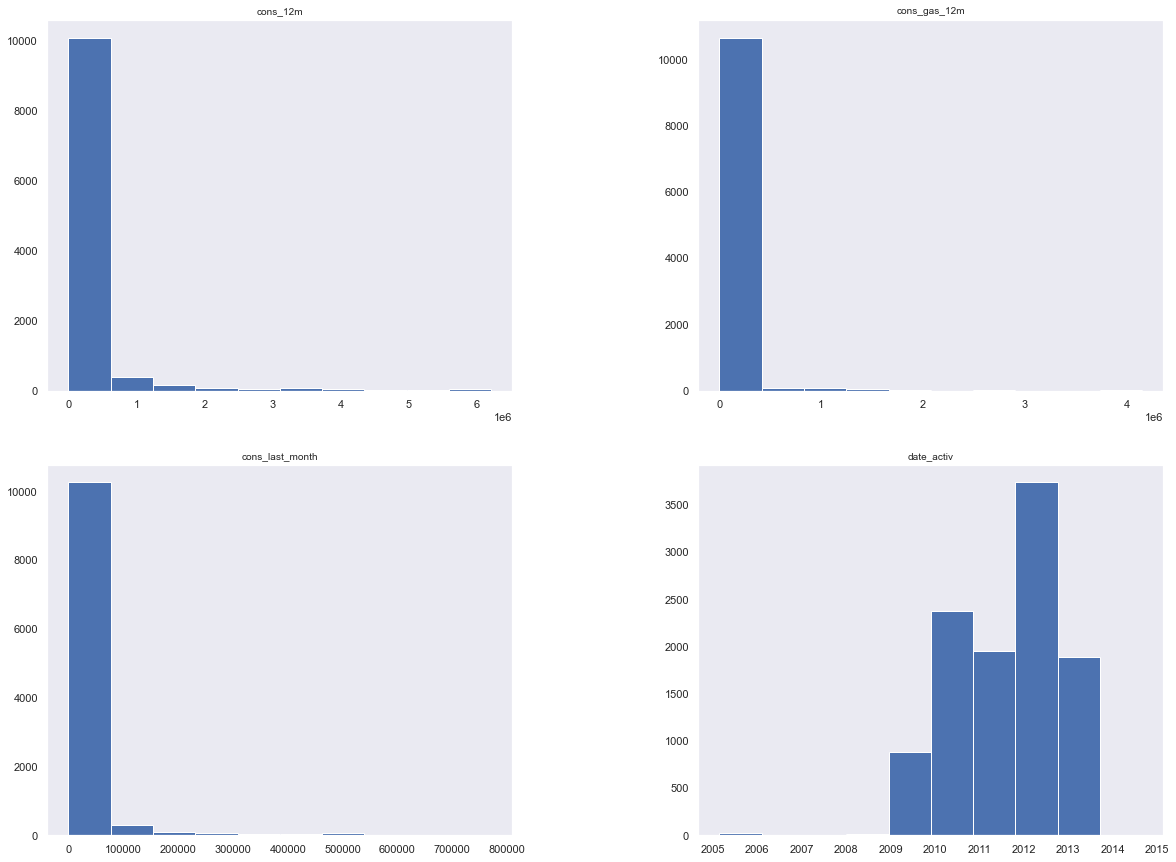

In [29]:
#explore the numerical with visualization 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[25,15])
fig.set_size_inches(20, 15)
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.2)

for items, ax in zip(num_col[0:4], axes.flatten()):
    status = client_df[items]
    ax.hist(x=status)
    ax.set_title(f'{items}',  fontsize=10)
plt.show()

###### observation:
consumption of gas nd gas has deteroriate in the last in 12 month,
client are more active between the 2009 and 2013


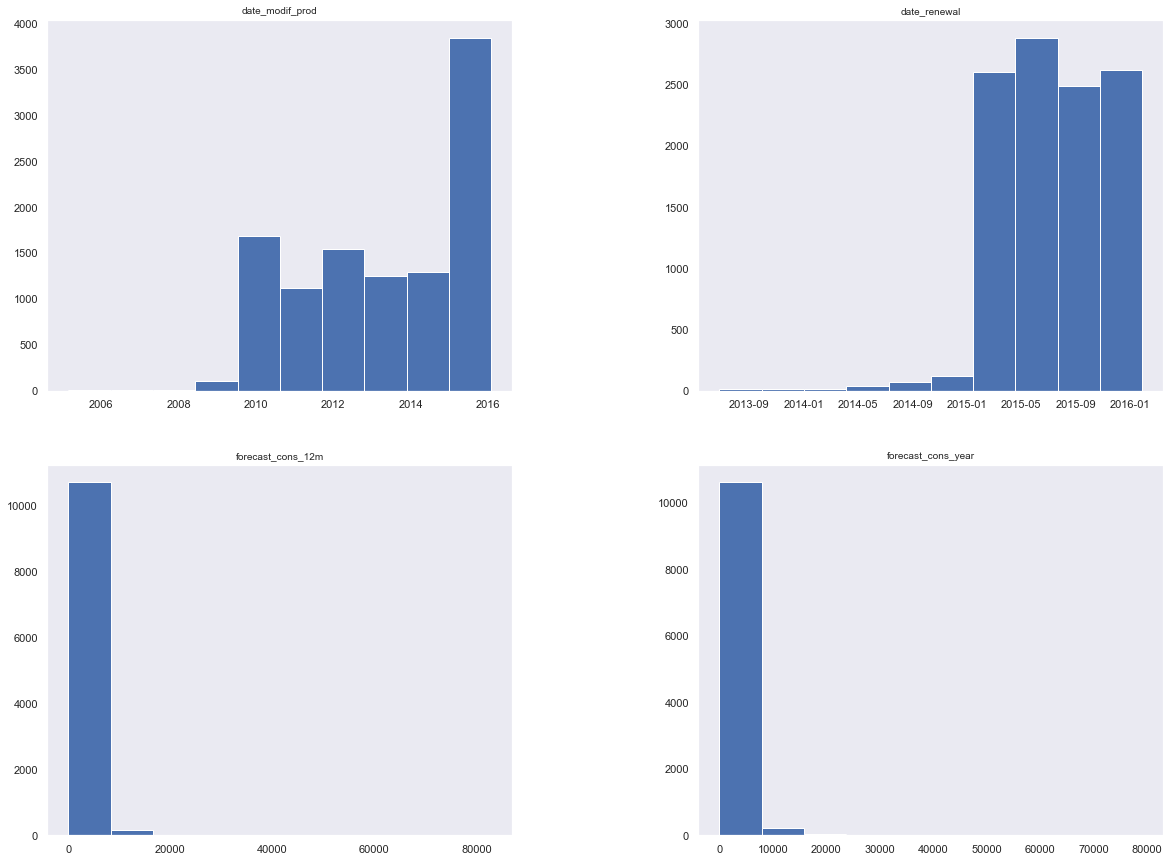

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[25,15])

fig.set_size_inches(20, 15)
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.2)

for items, ax in zip(num_col[5:9], axes.flatten()):
    status = client_df[items]
    ax.hist(x=status)
    ax.set_title(f'{items}',  fontsize=10)
plt.show()

###### observation:
the modification shows its impact on client retention


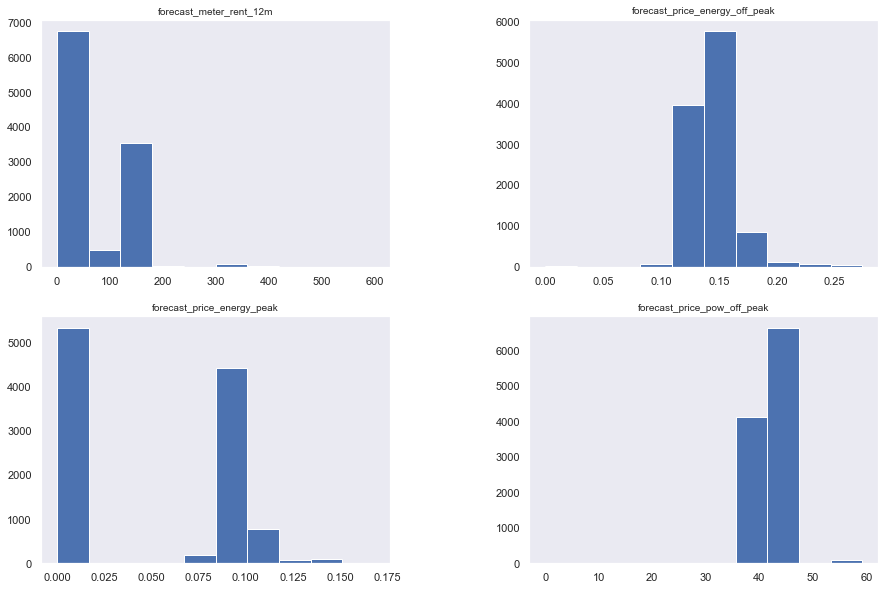

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[25,15])

fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.2)

for items, ax in zip(num_col[10:14], axes.flatten()):
    status = client_df[items]
    ax.hist(x=status)
    ax.set_title(f'{items}',  fontsize=10)
plt.show()

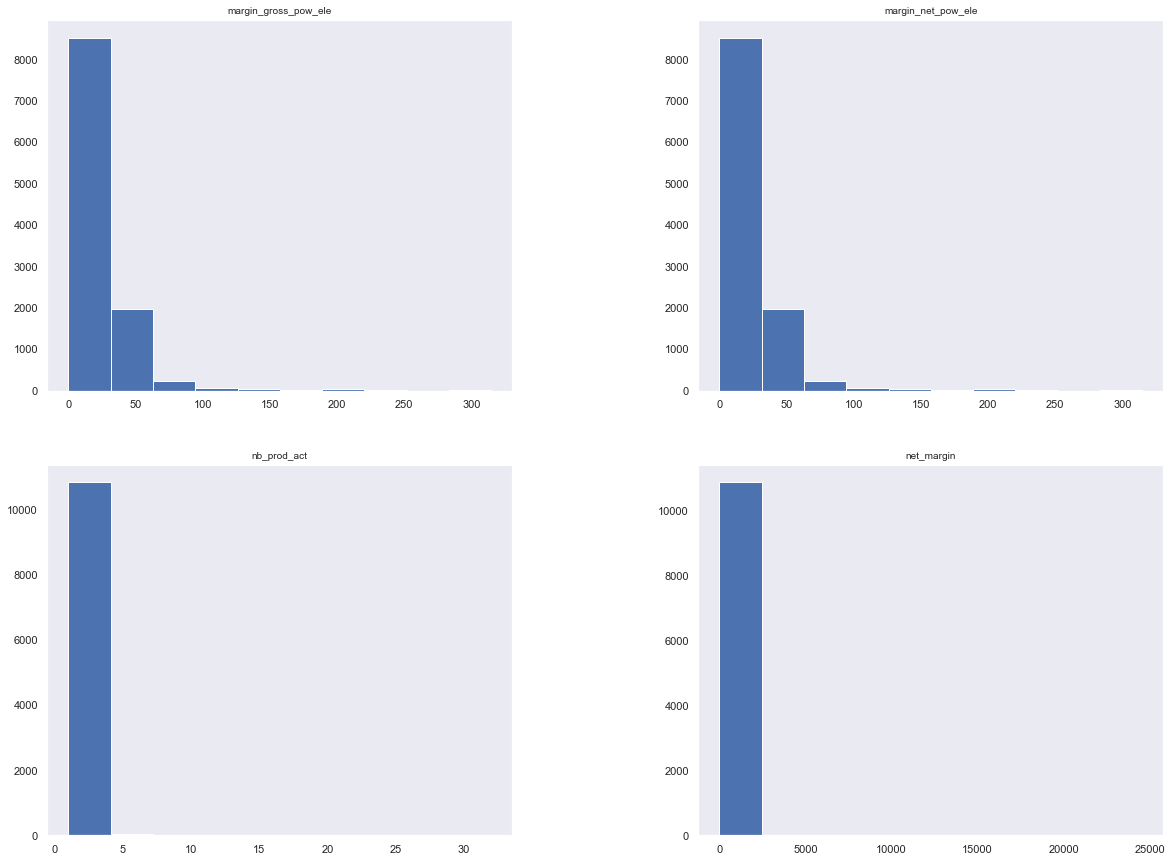

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[25,15])

fig.set_size_inches(20, 15)
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.2)

for items, ax in zip(num_col[15:], axes.flatten()):
    status = client_df[items]
    ax.hist(x=status)
    ax.set_title(f'{items}',  fontsize=10)
plt.show()

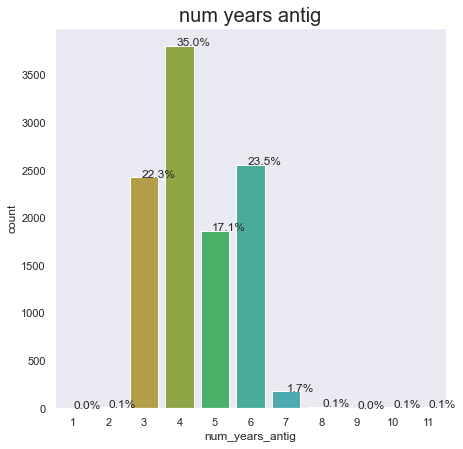

In [67]:
sns.set(style="dark")
plt.figure(figsize=[7,7])
total=float(len(client_df['num_years_antig']))
ax=sns.countplot(x="num_years_antig", data=client_df)
plt.title("num years antig", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

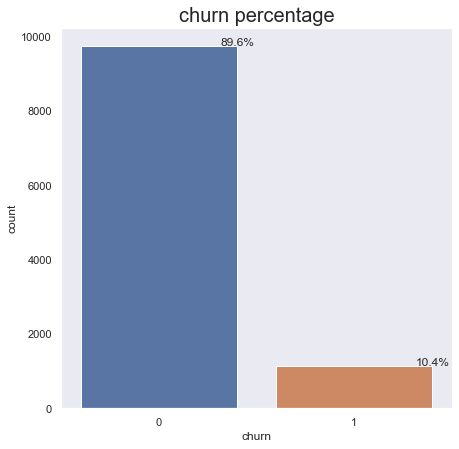

In [68]:
##plotting the percentage of customer retention vs churn
sns.set(style="dark")
plt.figure(figsize=[7,7])
total=float(len(client_df['churn']))
ax=sns.countplot(x='churn', data=client_df)
plt.title("churn percentage", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

###### observation: 
                there is a significant number of churn client(10.4%)

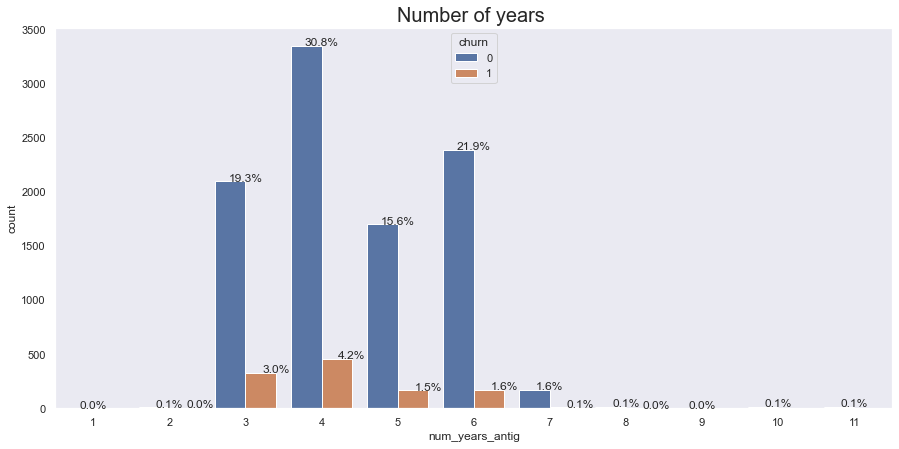

In [35]:
## plotting the years of client with churn

sns.set(style="dark")
plt.figure(figsize=[15,7])
total=float(len(client_df['num_years_antig']))
ax=sns.countplot(x="num_years_antig", data=client_df, hue="churn")
plt.title("Number of years ", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

###### observation:
                client within the range of 2 to 7 years have churn the most
            

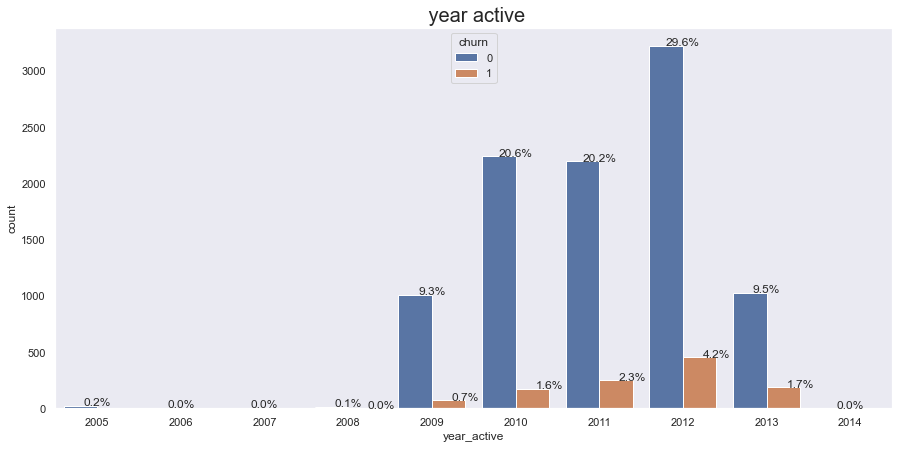

In [73]:
## visualizing the years client were active with the churn rate for each year


sns.set(style="dark")
plt.figure(figsize=[15,7])
total=float(len(client_df['year_active']))
ax=sns.countplot(x="year_active", data=client_df, hue="churn")
plt.title(" year active", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

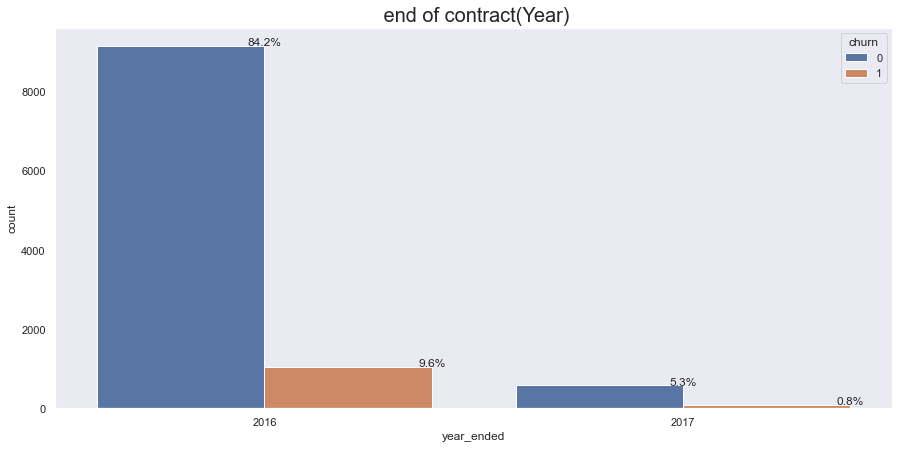

In [74]:
sns.set(style="dark")
plt.figure(figsize=[15,7])
total=float(len(client_df['year_ended']))
ax=sns.countplot(x="year_ended", data=client_df, hue="churn")
plt.title(" end of contract(Year)", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

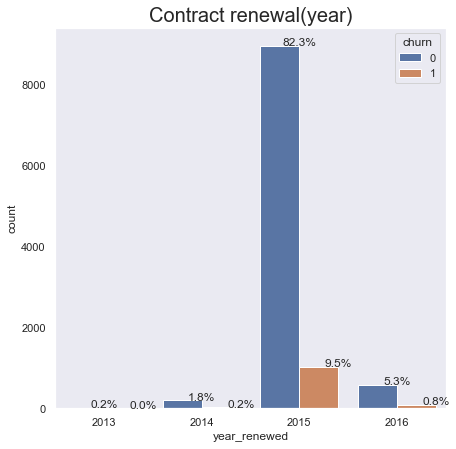

In [75]:
sns.set(style="dark")
plt.figure(figsize=[7,7])
total=float(len(client_df['year_renewed']))
ax=sns.countplot(x='year_renewed', data=client_df, hue="churn")
plt.title("Contract renewal(year)", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

In [39]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [40]:
price_df["id"].nunique()

16096

In [ ]:
price_df["price_date"]=pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [42]:
price_df["price_year"]=price_df["price_date"].dt.year

In [43]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'price_year'],
      dtype='object')

In [44]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
price_year                     int64
dtype: object

In [45]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
price_year                1
dtype: int64

C:\Users\JOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_off_peak_var', ylabel='Density'>

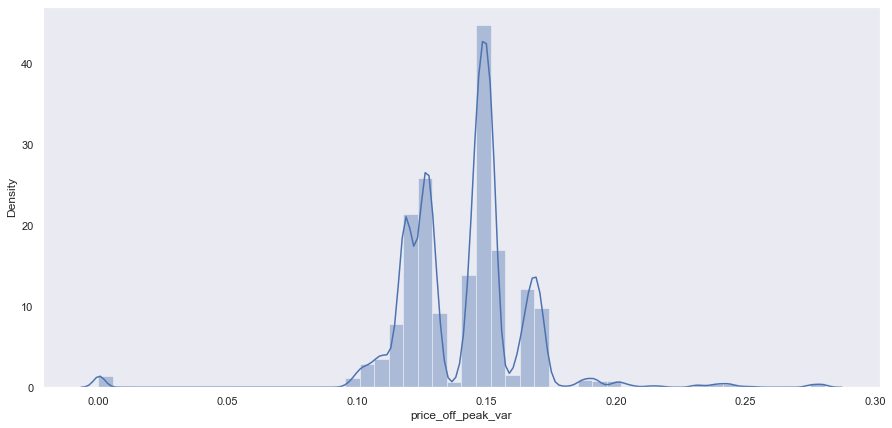

In [46]:
plt.figure(figsize=[15, 7])
sns.distplot(price_df["price_off_peak_var"])

C:\Users\JOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_peak_var', ylabel='Density'>

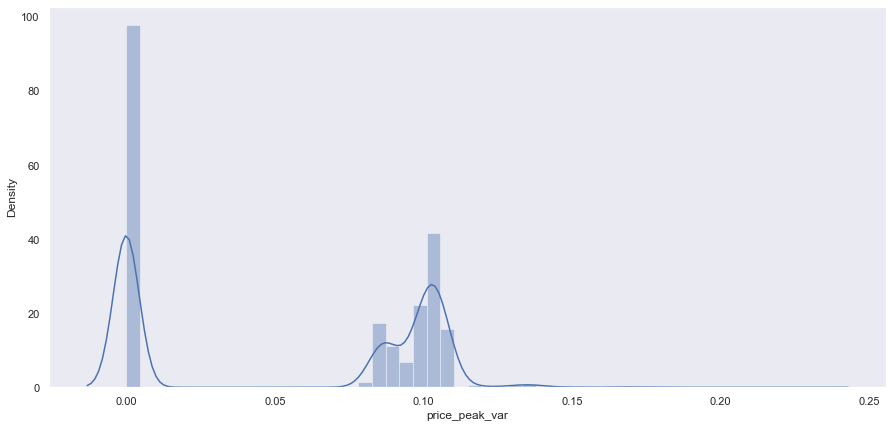

In [47]:
plt.figure(figsize=[15, 7])
sns.distplot(price_df["price_peak_var"])

C:\Users\JOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_mid_peak_var', ylabel='Density'>

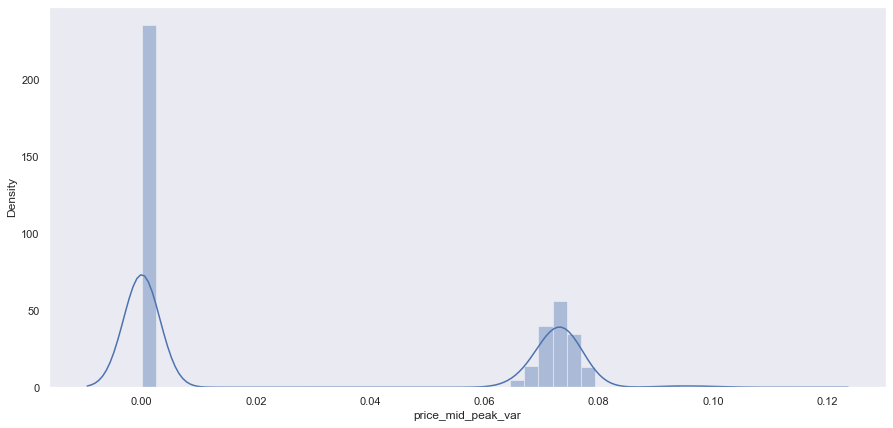

In [48]:
plt.figure(figsize=[15, 7])
sns.distplot(price_df["price_mid_peak_var"])

C:\Users\JOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_off_peak_fix', ylabel='Density'>

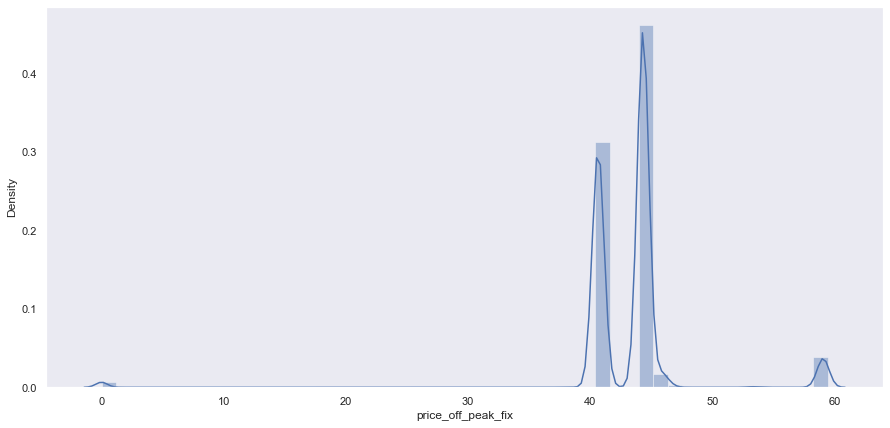

In [49]:
plt.figure(figsize=[15, 7])
sns.distplot(price_df["price_off_peak_fix"])

C:\Users\JOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_peak_fix', ylabel='Density'>

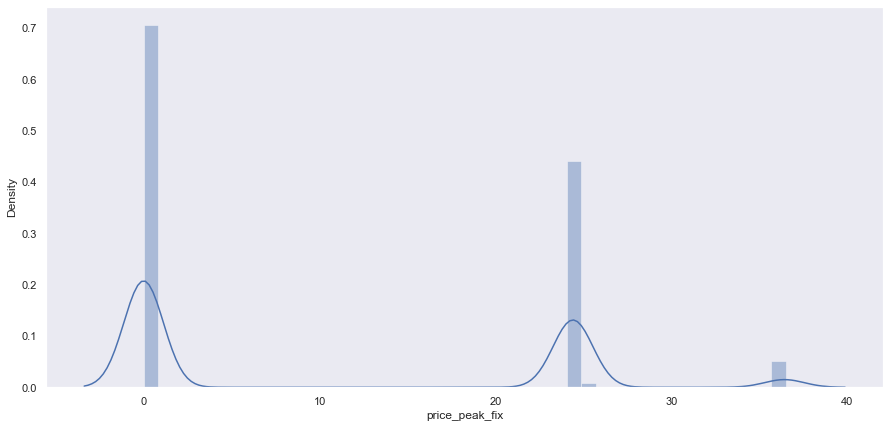

In [50]:
plt.figure(figsize=[15, 7])
sns.distplot(price_df["price_peak_fix"])

<AxesSubplot:xlabel='price_mid_peak_fix', ylabel='Count'>

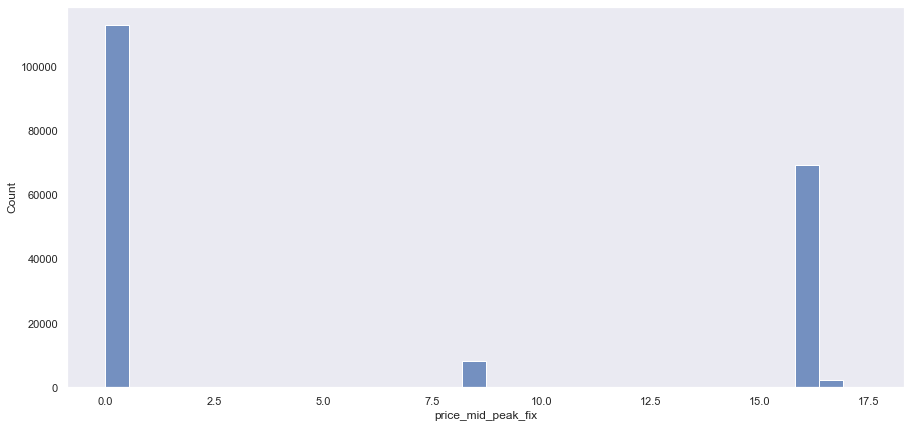

In [51]:
plt.figure(figsize=[15, 7])
sns.histplot(price_df["price_mid_peak_fix"])

In [52]:
price_df=price_df.merge(client_df[["id", "churn"]], on=["id"], how="left")

In [53]:
price_df=price_df.dropna(subset=["id"]).reset_index(drop=True)

In [54]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_year,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,2015,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,2015,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,2015,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,2015,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,2015,0.0
...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,2015,0.0
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,2015,0.0
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,2015,0.0
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,2015,0.0


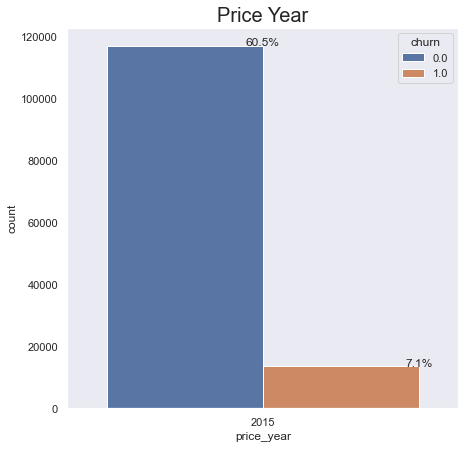

In [77]:
sns.set(style="dark")
plt.figure(figsize=[7,7])
total=float(len(price_df['price_year']))
ax=sns.countplot(x='price_year', data=price_df, hue="churn")
plt.title("Price Year", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()